## An example of a polynomial fitting to the data

In this example, we simulate data in the form $(x_i, y_i)$, $i = 1, \ldots, n$ and fit the data by a polynomial regression.

First, let's import necessary packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

We assume that values of $x_i \in [-6, 6]$ and are collected on the uniform grid;$y_i$ are generated according to the formula

$$1.5x^3 - 0.8x^2 + 2x + \varepsilon_i, \: \varepsilon_i \sim N(0, \sqrt{15}), \: i = 1, \ldots, n.$$

In [4]:
# setting a seed for a random number generator (for reproducibility) 
np.random.default_rng(seed=3141592)

# setting number of observations
n = 50

# generating random errors (noise, epsilon variable)
noise = np.random.normal(0, 15, n)

# generating (x[i], y[i])
x = np.linspace(-6, 6, n)
y = 1.5 * x**3 - 0.8 * x**2 + 2 * x + noise

Now, let's visualize our simulated observations but assuming $x_i\in[-6, 1]$.

_**Visualization results will be stored in the local folder "./figures" -- be shure that the folder exists in your local path**_.

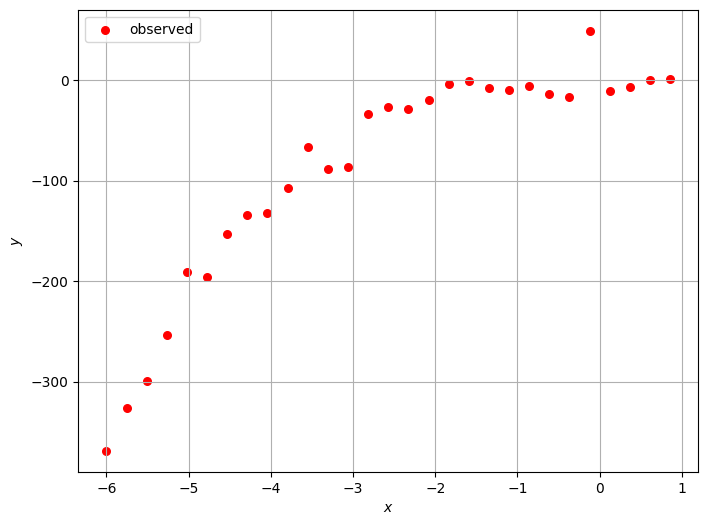

In [12]:
# truncated observations (x<=1)
x_truncated = x[x <= 1]
y_truncated = y[x <= 1]

# visualizing data
plt.figure(figsize = (8, 6))
plt.scatter(x_truncated, y_truncated, color = "red", s = 30, label = "observed")
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(loc = "upper left")
plt.savefig("figures/lecture01-ex01a.png", dpi = 300)

Now, let's fit the simulated observations with a polynomial. We are going to use polinomials of degree 1 (_linear_), 2 (_quadratic_), and 3 (_cubic_).

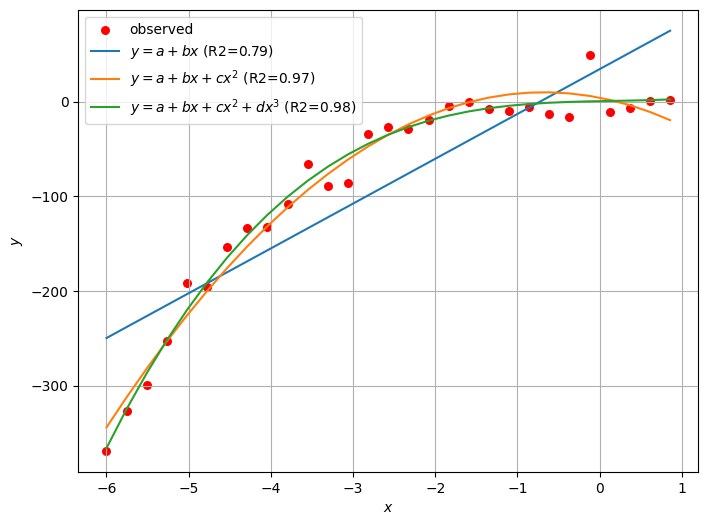

In [18]:
# scatter plot of the observed data
plt.figure(figsize = (8, 6))
plt.scatter(x_truncated, y_truncated, color = "red", s = 30, label = "observed")

# fitting polynomials of degree 1, 2, 3
for deg in [1, 2, 3]:
    poly = PolynomialFeatures(degree=deg)
    
    # truncted data
    X0 = poly.fit_transform(x_truncated.reshape(-1, 1))
    y0 = y_truncated
    
    # full data
    X1 = poly.fit_transform(x.reshape(-1, 1))
    y1 = y

    # fitting truncated data
    model = LinearRegression().fit(X0, y0)

    # prediction and score
    # - truncated data
    y_pred0 = model.predict(X0)
    R20 = round(model.score(X0, y0), 2)

    # adding prediction to the plot
    match deg:
        case 1:
            # - full data
            y_pred_full1 = model.predict(X1)
            R2_full1 = round(model.score(X1, y1), 2)

            plt.plot(x_truncated, y_pred0, label = r"$y = a+bx$ (R2={})".format(R20))
        case 2:
            # - full data
            y_pred_full2 = model.predict(X1)
            R2_full2 = round(model.score(X1, y1), 2)

            plt.plot(x_truncated, y_pred0, label = r"$y = a+bx+cx^2$ (R2={})".format(R20))
        case 3:
            # - full data
            y_pred_full3 = model.predict(X1)
            R2_full3 = round(model.score(X1, y1), 2)

            plt.plot(x_truncated, y_pred0, label = r"$y = a+bx+cx^2+dx^3$ (R2={})".format(R20))

plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(loc="upper left")
plt.savefig("figures/lecture01-ex01b.png", dpi = 300)

As we can see, _quadratic_ and _qubic_ fits do a good job. $R^2 = 0.97$ (for the _quadratic_ fit) and $R^2 = 0.98$ (for the _qubic_ fit).

Now, let's look what happens if a new postion of data is available, and the new observation are outside the distribution of the observations used for model fitting.

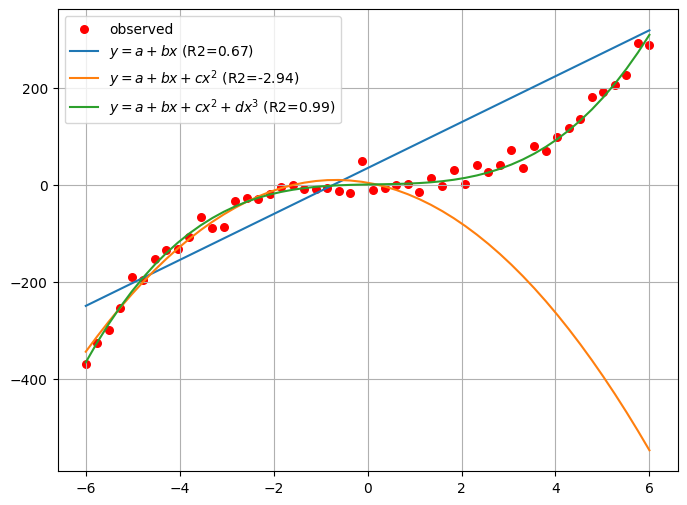

In [19]:
# visualizing full set of observations
plt.figure(figsize = (8, 6))
plt.scatter(x, y, color = "red", s = 30, label = "observed")
plt.grid()
plt.legend(loc="upper left")

# prediction for a full data
for deg in [1, 2, 3]:
    # adding prediction to the plot
    match deg:
        case 1:
            plt.plot(x, y_pred_full1, label = r"$y = a+bx$ (R2={})".format(R2_full1))
        case 2:
            plt.plot(x, y_pred_full2, label = r"$y = a+bx+cx^2$ (R2={})".format(R2_full2))
        case 3:
            plt.plot(x, y_pred_full3, label = r"$y = a+bx+cx^2+dx^3$ (R2={})".format(R2_full3))

plt.legend(loc = "upper left")
plt.savefig("figures/lecture01-ex01d.png", dpi = 300)

As we can see, the _quadratic_ fit performs very poor on the full dataset 
($R^2 < 0$, which means huge discrepancy between observed and predicted value).

The _qubic_ fit does a really good job!